<a href="https://colab.research.google.com/github/marcelambicalho/crop_yields_predictions/blob/main/crop_yields_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Dataset Informaton
**Source:** https://www.kaggle.com/code/mohsin31202/crop-yield-prediction/input?select=yield_df.csv

### Feature Explanation

* **`Area`**: The name of the country or region where the crop data was collected.
* **`area_codes`**: Numerical encoding of the `Area` for use in machine learning models.
* **`Item`**: The type of crop (e.g., Maize, Potatoes, Rice, Wheat).
* **`item_codes`**: Numerical encoding of the `Item` for modeling purposes.
* **`Year`**: The year in which the data was recorded.
* **`hg/ha_yield`**: The crop yield, measured in hectograms per hectare.
* **`average_rain_fall_mm_per_year`**: The average annual rainfall (in millimeters) in the given area for that year.
* **`pesticides_tonnes`**: The total amount of pesticides used in the area during that year, measured in tonnes.
* **`avg_temp`**: The average annual temperature (in degrees Celsius) for the area and year.




# Import Dataset

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load Dataset
crop_df = pd.read_csv('yield_df.csv', encoding='latin1')
crop_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [70]:
crop_df.shape

(28242, 8)

In [71]:
# Explore Unnamed column
crop_df['Unnamed: 0']

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
28237,28237
28238,28238
28239,28239
28240,28240


Seems to be the same as an Index column and so, as it does not seem very relevant, we can drop it from the dataset.

In [72]:
# Drop Unnamed
crop_df.drop('Unnamed: 0', axis=1, inplace=True)
crop_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Data Cleaning

In [73]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


For further analysis, we can turn the object variables (Area and Item) into numerical variables, by assigning a number code to each unique value.

In [74]:
# Get Area's unique values
crop_df['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [75]:
# Get Item's unique values
crop_df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [76]:
# Create code numbers for each Area
area_codes = {name: n for n, name in enumerate(crop_df['Area'].unique(), 1)}
area_codes

{'Albania': 1,
 'Algeria': 2,
 'Angola': 3,
 'Argentina': 4,
 'Armenia': 5,
 'Australia': 6,
 'Austria': 7,
 'Azerbaijan': 8,
 'Bahamas': 9,
 'Bahrain': 10,
 'Bangladesh': 11,
 'Belarus': 12,
 'Belgium': 13,
 'Botswana': 14,
 'Brazil': 15,
 'Bulgaria': 16,
 'Burkina Faso': 17,
 'Burundi': 18,
 'Cameroon': 19,
 'Canada': 20,
 'Central African Republic': 21,
 'Chile': 22,
 'Colombia': 23,
 'Croatia': 24,
 'Denmark': 25,
 'Dominican Republic': 26,
 'Ecuador': 27,
 'Egypt': 28,
 'El Salvador': 29,
 'Eritrea': 30,
 'Estonia': 31,
 'Finland': 32,
 'France': 33,
 'Germany': 34,
 'Ghana': 35,
 'Greece': 36,
 'Guatemala': 37,
 'Guinea': 38,
 'Guyana': 39,
 'Haiti': 40,
 'Honduras': 41,
 'Hungary': 42,
 'India': 43,
 'Indonesia': 44,
 'Iraq': 45,
 'Ireland': 46,
 'Italy': 47,
 'Jamaica': 48,
 'Japan': 49,
 'Kazakhstan': 50,
 'Kenya': 51,
 'Latvia': 52,
 'Lebanon': 53,
 'Lesotho': 54,
 'Libya': 55,
 'Lithuania': 56,
 'Madagascar': 57,
 'Malawi': 58,
 'Malaysia': 59,
 'Mali': 60,
 'Mauritania': 61

In [77]:
# Create number codes for each Item
item_codes = {name: n for n, name in enumerate(crop_df['Item'].unique(), 1)}
item_codes

{'Maize': 1,
 'Potatoes': 2,
 'Rice, paddy': 3,
 'Sorghum': 4,
 'Soybeans': 5,
 'Wheat': 6,
 'Cassava': 7,
 'Sweet potatoes': 8,
 'Plantains and others': 9,
 'Yams': 10}

In [78]:
# Add area_codes and item_codes as new columns
# Map the codes to the DataFrame
crop_df['area_codes'] = crop_df['Area'].map(area_codes)
crop_df['item_codes'] = crop_df['Item'].map(item_codes)

# Find the index positions
area_index = crop_df.columns.get_loc("Area")
item_index = crop_df.columns.get_loc("Item")

# Insert columns next to their respective counterparts
crop_df.insert(area_index + 1, "area_codes", crop_df.pop("area_codes"))
crop_df.insert(item_index + 1, "item_codes", crop_df.pop("item_codes"))

# Display updated DataFrame
crop_df.head()

,Area,area_codes,item_codes,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,1,2,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,1,3,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,1,4,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,1,5,Soybeans,1990,7000,1485.0,121.0,16.37


In [79]:
# Check for Missing Values
crop_df.isnull().sum()

,0
Area,0
area_codes,0
item_codes,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


# EDA

## Univariate Analysis

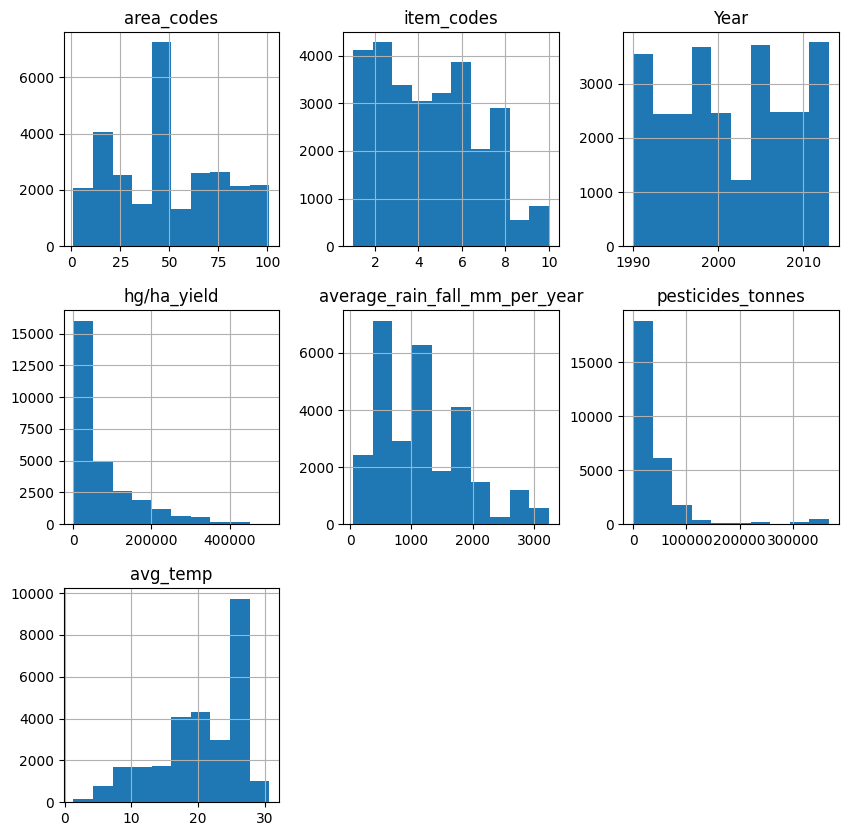

In [80]:
# Variables Distribution
## Visualize with histograms
crop_df.hist(figsize=(10,10))
plt.show()

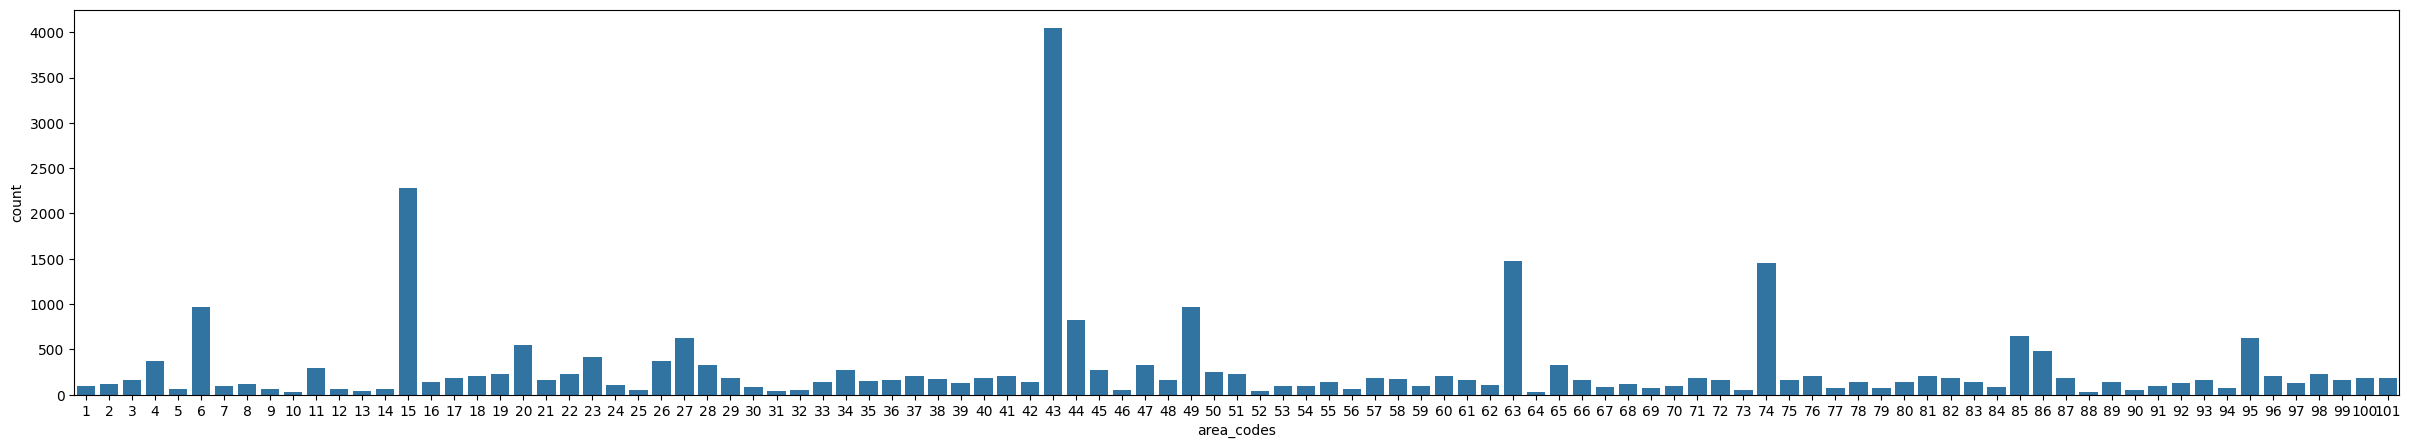

In [81]:
# Count Area bar plot
plt.figure(figsize=(30,5))
sns.countplot(x='area_codes', data=crop_df)
plt.show()

Countries such as 43, 15 and 63 have significant presence in the dataset. This means that these countries represent most of the data provided, either through their crop yields or other characteristics (pesticides, for example).

In [82]:
# Filter Area and area_code = 43
crop_df[crop_df['area_codes'] == 43]

,Area,area_codes,item_codes,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
10502,India,43,7,Cassava,1990,205381,1083.0,75000.0,25.58
10503,India,43,7,Cassava,1990,205381,1083.0,75000.0,26.88
10504,India,43,7,Cassava,1990,205381,1083.0,75000.0,25.79
10505,India,43,7,Cassava,1990,205381,1083.0,75000.0,24.10
10506,India,43,7,Cassava,1990,205381,1083.0,75000.0,25.25
...,...,...,...,...,...,...,...,...,...
14545,India,43,6,Wheat,2013,31538,1083.0,45620.0,27.14
14546,India,43,6,Wheat,2013,31538,1083.0,45620.0,25.98
14547,India,43,6,Wheat,2013,31538,1083.0,45620.0,27.44
14548,India,43,6,Wheat,2013,31538,1083.0,45620.0,27.44


In [83]:
# highest area counts in descending order
crop_df['Area'].value_counts().head(10)


,count
Area,
India,4048
Brazil,2277
Mexico,1472
Pakistan,1449
Australia,966
Japan,966
Indonesia,828
South Africa,644
Turkey,625


Countries of India, Brazil and Mexico appear to have the highest performance over the years in the dataset, which also corresponds to the previous bar plot.

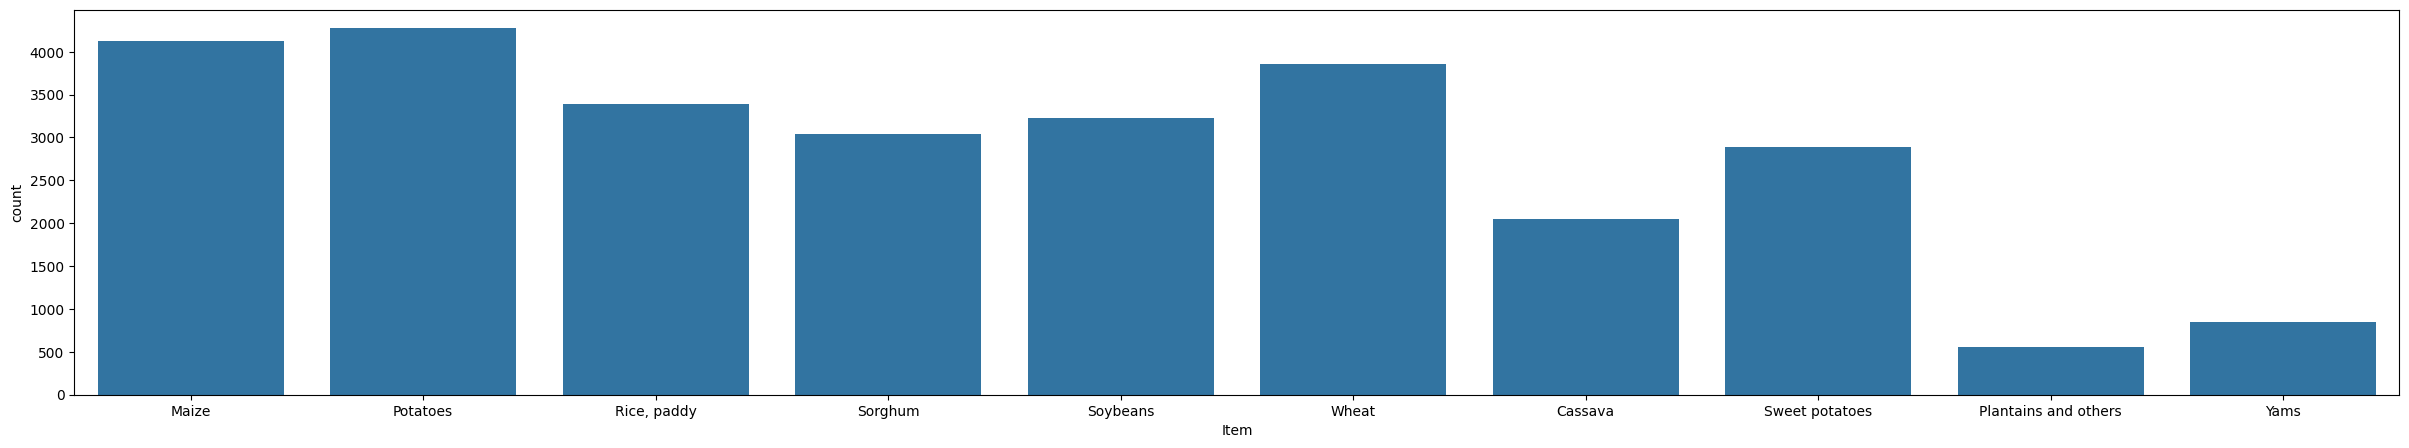

In [108]:
# Count the items
plt.figure(figsize=(30,5))
sns.countplot(x='Item', data=crop_df)
plt.show()

In [85]:
# Rank most occuring items
crop_df['Item'].value_counts().head(10)

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


## Bivariate Analysis

In [86]:
# Remove non-numeric variables
crop_df_num = crop_df.select_dtypes(include=[np.number])
crop_df_num.head()

,area_codes,item_codes,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1,1,1990,36613,1485.0,121.0,16.37
1,1,2,1990,66667,1485.0,121.0,16.37
2,1,3,1990,23333,1485.0,121.0,16.37
3,1,4,1990,12500,1485.0,121.0,16.37
4,1,5,1990,7000,1485.0,121.0,16.37


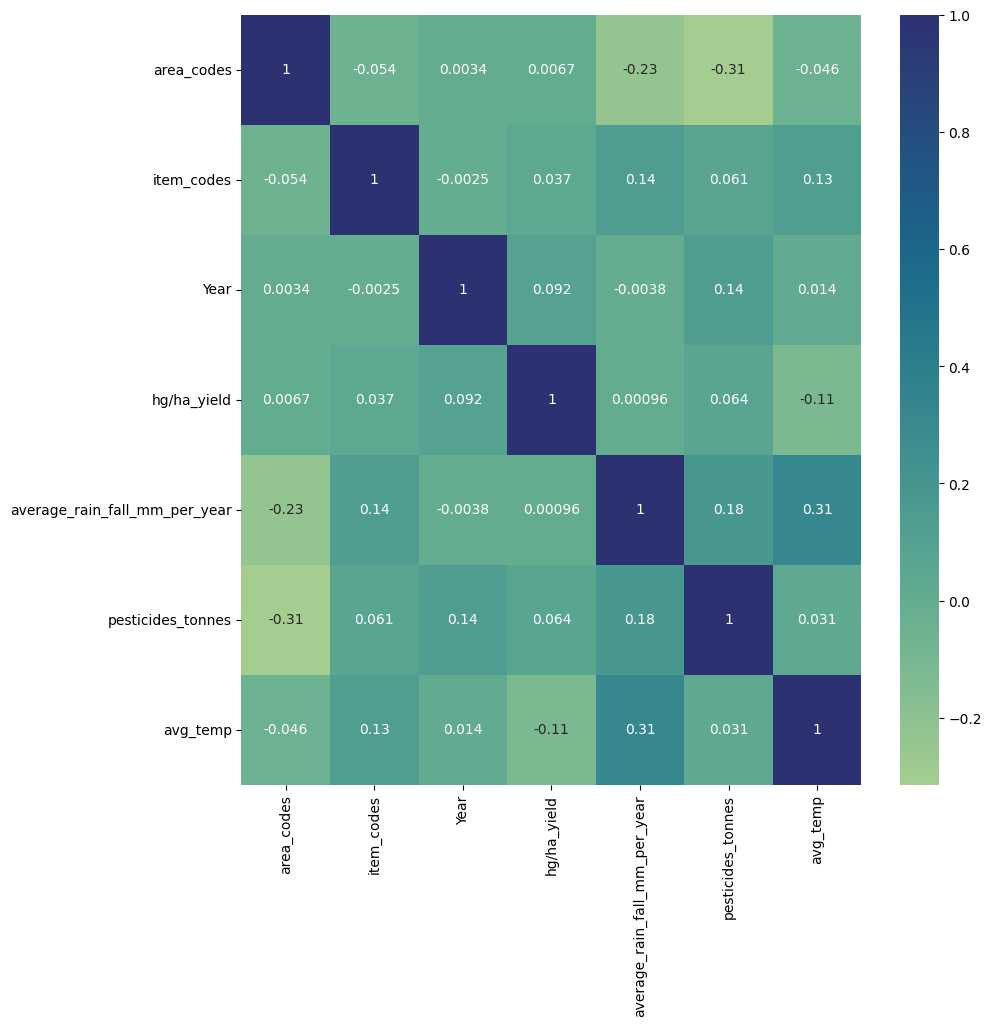

In [121]:
# Correlation Matrix
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(crop_df_num.corr(), annot=True, cmap='crest')
plt.show()

Most variables seem to be not very correlated or inversely correlated with each other, meaning as one increases the other decreases and vice-versa.

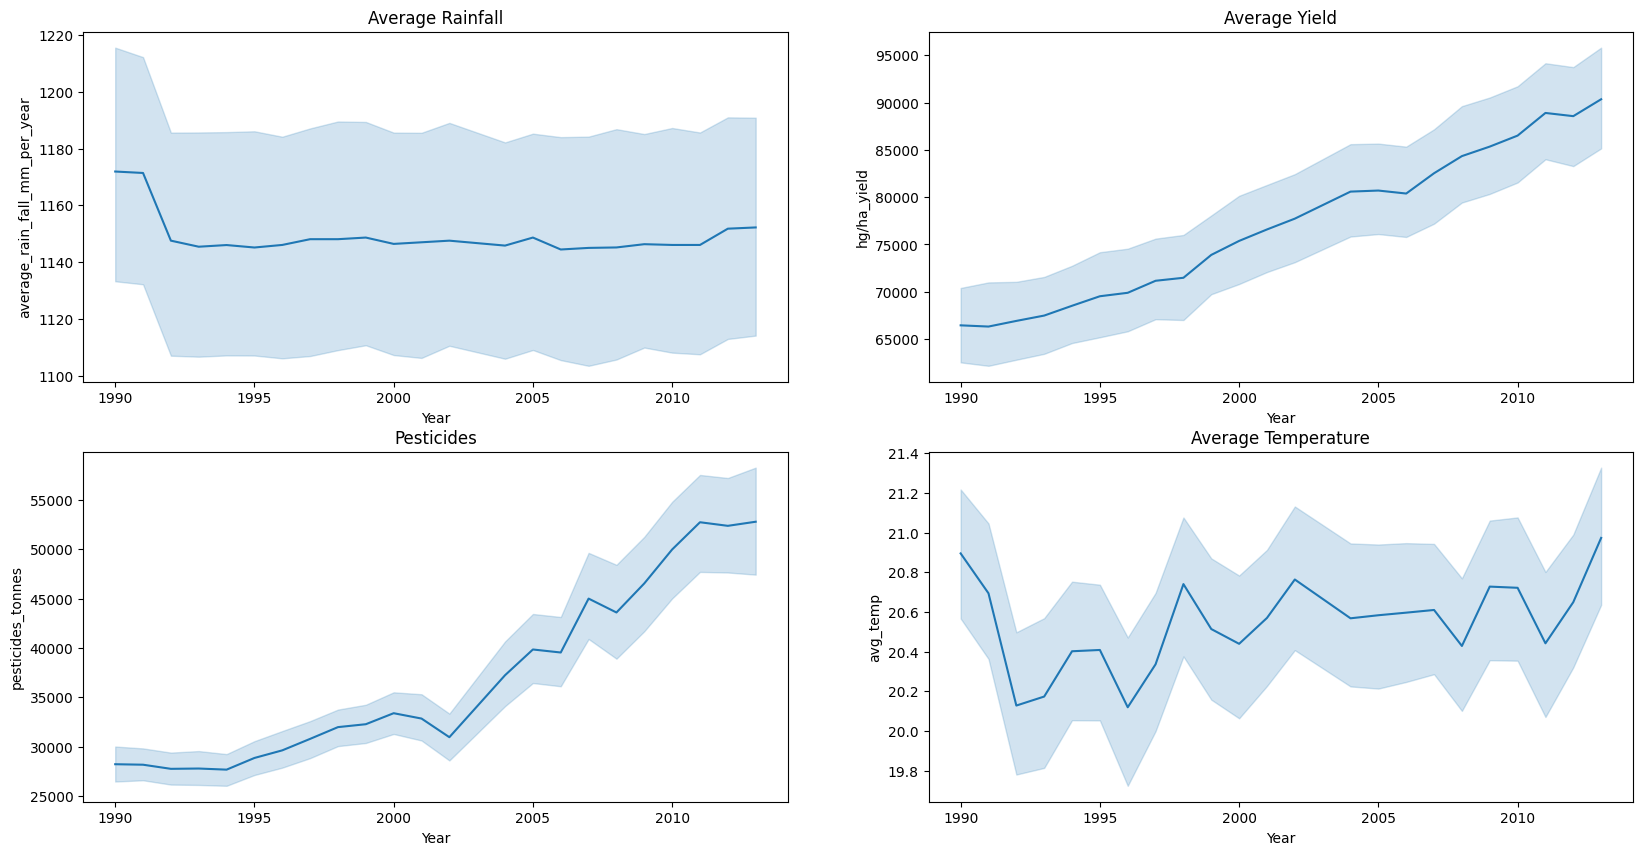

In [88]:
# Time Series for Rainfall Average, Yield, Pesticides and Temperature
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x='Year', y='average_rain_fall_mm_per_year', data=crop_df)
plt.title('Average Rainfall')
plt.subplot(2,2,2)
sns.lineplot(x='Year', y='hg/ha_yield', data=crop_df)
plt.title('Average Yield')
plt.subplot(2,2,3)
sns.lineplot(x='Year', y='pesticides_tonnes', data=crop_df)
plt.title('Pesticides')
plt.subplot(2,2,4)
sns.lineplot(x='Year', y='avg_temp', data=crop_df)
plt.title('Average Temperature')
plt.show()

Include graph interpretations here

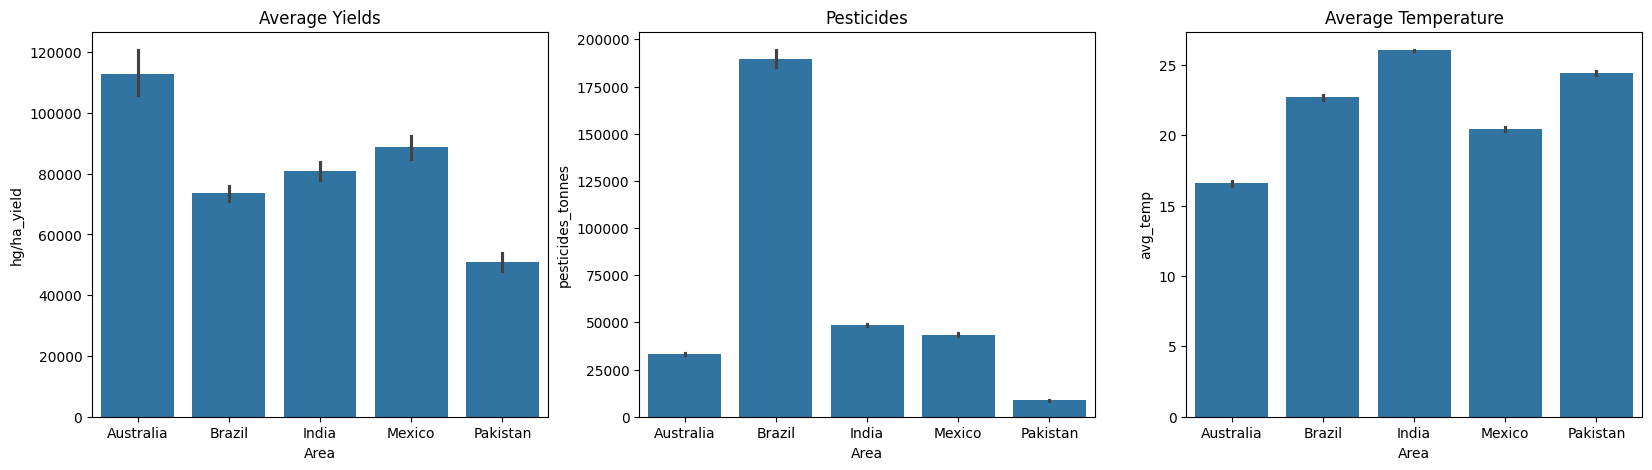

In [89]:
# Yields, Pesticides and Temperature of Top 5 Countries
top_countries = ['India', 'Brazil', 'Mexico', 'Pakistan', 'Australia']

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.barplot(x='Area', y='hg/ha_yield', data=crop_df[crop_df['Area'].isin(top_countries)])
plt.title('Average Yields')
plt.subplot(1,3,2)
sns.barplot(x='Area', y='pesticides_tonnes', data=crop_df[crop_df['Area'].isin(top_countries)])
plt.title('Pesticides')
plt.subplot(1,3,3)
sns.barplot(x='Area', y='avg_temp', data=crop_df[crop_df['Area'].isin(top_countries)])
plt.title('Average Temperature')
plt.show()



# Outlier Analysis

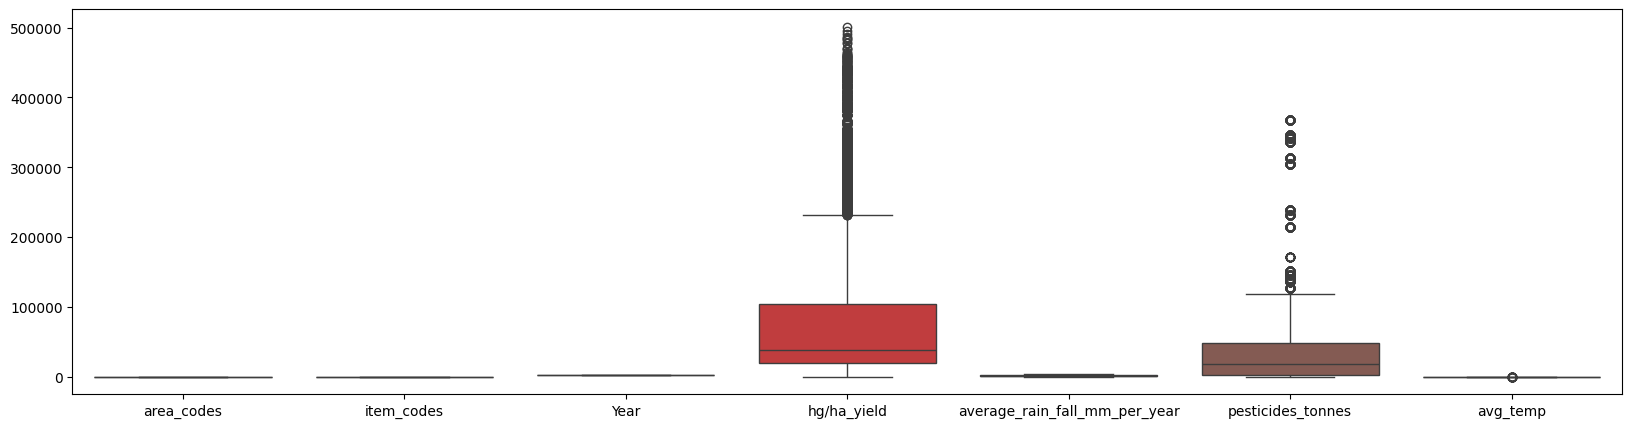

In [90]:
# boxplot of numerical features
plt.figure(figsize=(20,5))
sns.boxplot(data=crop_df_num)
plt.show()

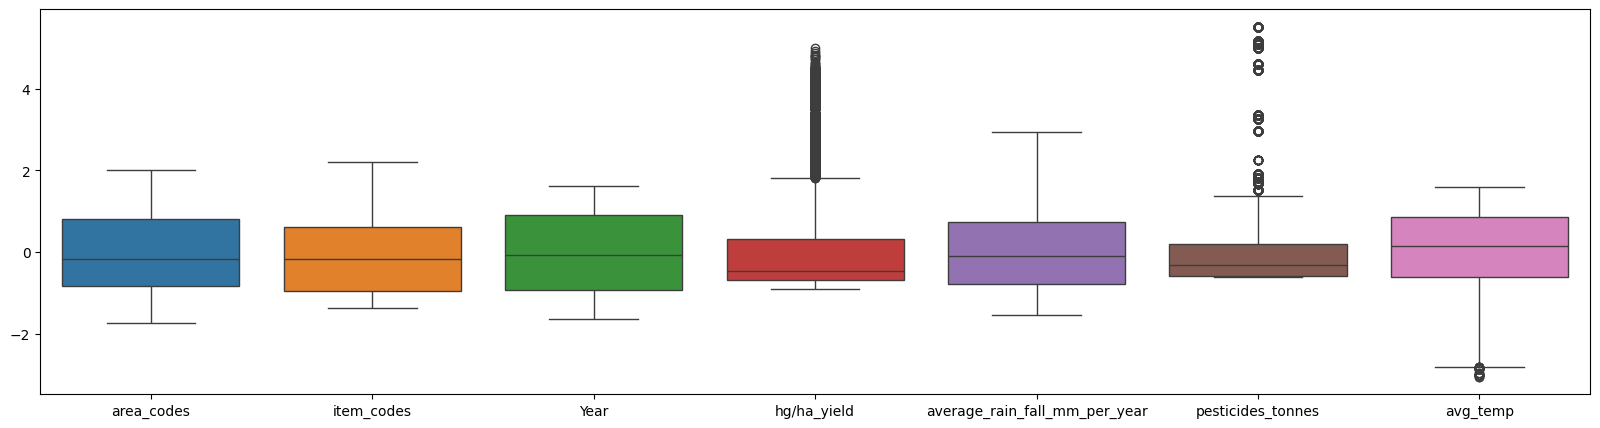

In [91]:
# Standardise and Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crop_df_scaled = scaler.fit_transform(crop_df_num)
crop_df_scaled = pd.DataFrame(crop_df_scaled, columns=crop_df_num.columns)

# Feature boxplots
plt.figure(figsize=(20,5))
sns.boxplot(data=crop_df_scaled)
plt.xticks(range(len(crop_df_num.columns)), crop_df_num.columns)
plt.show()

# Predictive Modelling

Now, we can try and create a model that is able to predict the most optimal yield based on other characteristics provided (area, avg rainfall, temperature, etc). As the features seem highly uncorrelated, different feature selection methods wil be tested.

## Linear Regression - All Features

In [92]:
# Train/Test Split - scaled data
from sklearn.model_selection import train_test_split
X = crop_df_scaled.drop('hg/ha_yield', axis=1)
y = crop_df_scaled['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
# Run Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [94]:
# Evaluate Model
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

Mean Squared Error: 0.974443261483938
R-squared: 0.030433401368218593


### KBest Feature Selection

In [95]:
# Perform KBest
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Print features selected
kbest_features = X.columns[selector.get_support()]
print(kbest_features)


Index(['area_codes', 'item_codes', 'Year', 'pesticides_tonnes', 'avg_temp'], dtype='object')


In [96]:
# Run Regression on KBest Features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print evaluation scores
mse_kbest = mean_squared_error(y_test, y_pred)
r2_kbest = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_kbest}")
print(f"R-squared: {r2_kbest}")

Mean Squared Error: 0.974443261483938
R-squared: 0.030433401368218593


Both methods got a very low R2 score and very hugh MSE (margin of error). Therefore, we can explore models that deal better with non-linear relationships inside the data.

# Random Forest Regressor

In [97]:
# Perform RFR
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [98]:
# Evaluate RFR
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.014086001961871904
R-squared: 0.9859844923246792


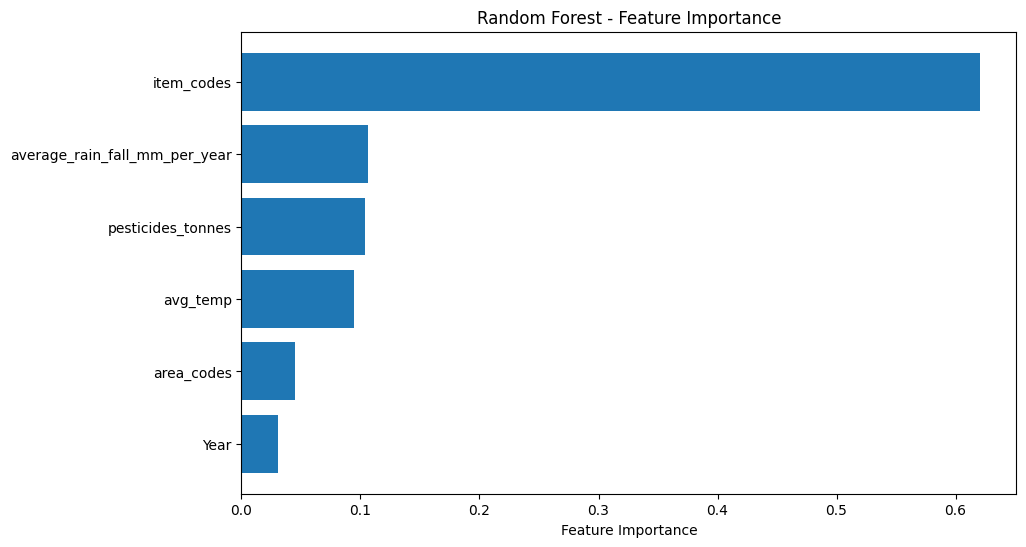

In [99]:
# Get most significant features
import matplotlib.pyplot as plt
import pandas as pd

importances = model_rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Not only did the model get significant performance (with an R2 of 0.98) but it also showed the impact of which item produced generates more optimal crop yields.

# Gradient Boosting

In [100]:
# Perform XGBoost
import xgboost as xgb

model_boost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_boost.fit(X_train, y_train)
y_pred = model_boost.predict(X_test)

In [101]:
# Evaluate model
mse_boost = mean_squared_error(y_test, y_pred)
r2_boost = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_boost}")
print(f"R-squared: {r2_boost}")

Mean Squared Error: 0.03883026116173128
R-squared: 0.9613640673329402


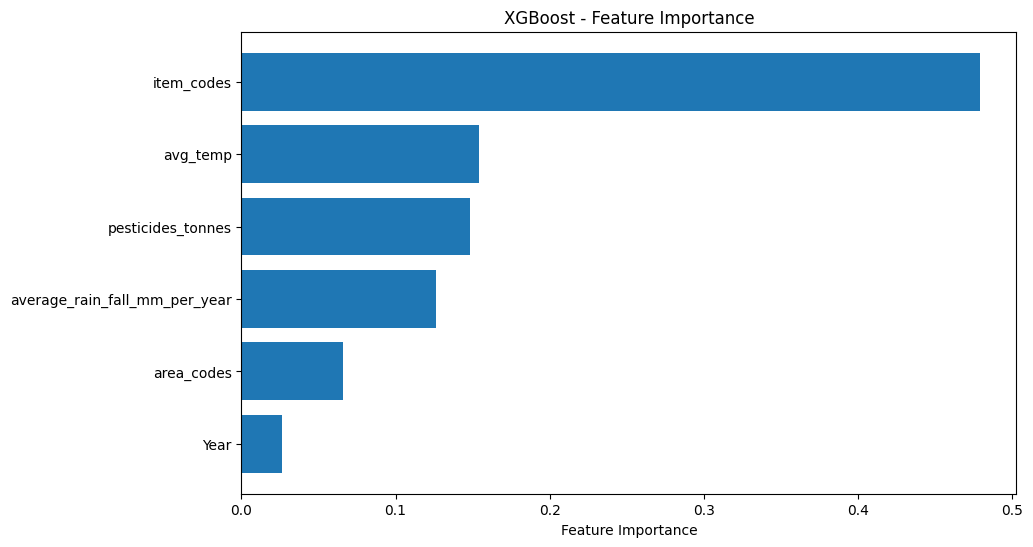

In [102]:
# Get most significant features - XGBoost

features = X.columns
importances = model_boost.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Models Comparison

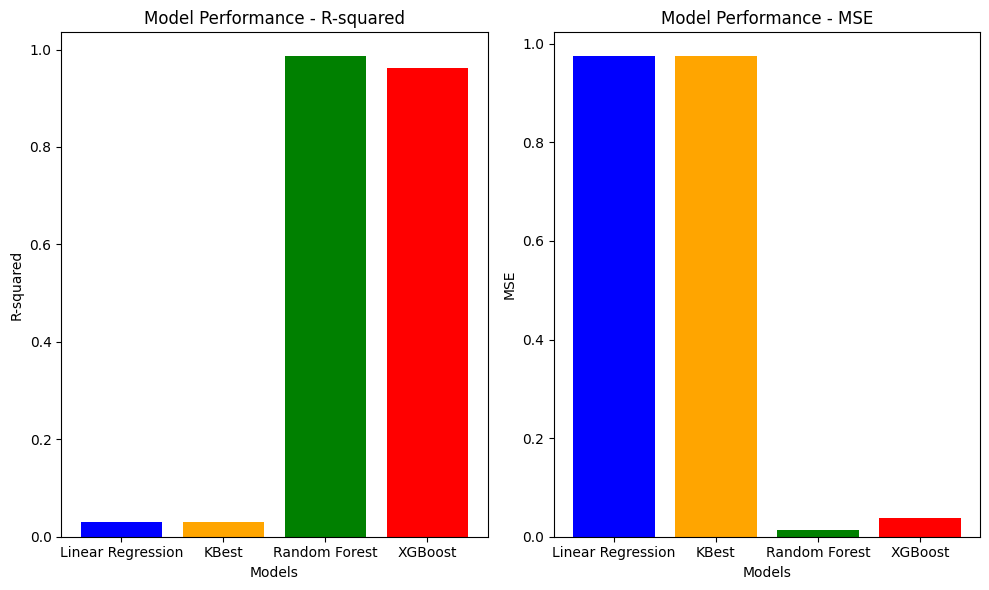

In [103]:
# Bar Plot with models R2 and MSE
models = ['Linear Regression', 'KBest', 'Random Forest', 'XGBoost']
r2_scores = [r2_linear, r2_kbest, r2_rf, r2_boost]
mse_scores = [mse_linear, mse_kbest, mse_rf, mse_boost]

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
# add different colours for each model
plt.bar(models, r2_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Performance - R-squared')

plt.subplot(1,2,2)
plt.bar(models, mse_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Model Performance - MSE')

plt.tight_layout()
plt.show()


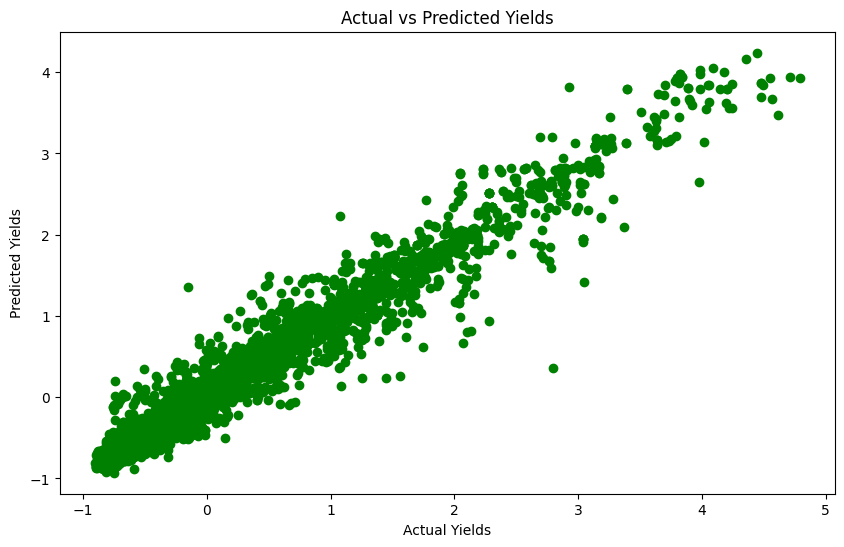

In [106]:
# Predicted vs Actual Yields Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs Predicted Yields')
plt.show()